# Stellar Structure on the Zero-Age Main Sequence 

Figure 8.2 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot of the convection regions in zero age main sequence stars with $X=0.70$ and $Z=0.02$, with
curves indicating the mass shells that enclose which 50% of the star's luminosity and radius

Data were extracted from ZAMS models computed using MESA (http://mesa.sourceforge.net).

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=DeprecationWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig8_2.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

Boundaries of the convection zones in the dimensionless mass coordinate ($m/M_\star$) were computed for stars with M$_\star$=0.15 to 100M$_\odot$ in roughly logarithmic intervals using MESA for solar composition (X=0.7, Z=0.02).  Code for reading MESA profile models etc. are elsewhere so here we only read the various ASCII text files with the curves we need (thus working with a few bytes instead of many MB of data).

Data files:
 * `ZAMS/l50r50zams.txt` - 50% luminosity and depth points at $M/M_\star$ as a function of M$_\star$.
 * `ZAMS/convLower.txt` - contour of the convection zone boundary in $M/M_\star$ at low masses (M$_\star<0.3$M$_\odot$).
 * `ZAMS/convUpper.txt` - contour of the convection zone boundary at high masses (M$_\star>1.2$M$_\odot$.
 
All files are ASCII multi-column format, first column is stellar initial mass M$_\star$, followed by the quantities of interest in units of $M/M_\star$.

In [3]:
# Curves of mass enclosing 50% luminosity and radius as a function of Mstar

lrFile = 'ZAMS/l50r50zams.txt'
data = pd.read_csv(lrFile,sep=r'\s+')
lrMstar = np.array(data['Mstar'])
mL50 = np.array(data['mL50'])
mR50 = np.array(data['mR50'])

# convection zone boundary on the lower-ZAMS

lowerFile = 'ZAMS/convLower.txt'
data = pd.read_csv(lowerFile,sep=r'\s+')
loMstar = np.array(data['Mstar'])
loMconv = np.array(data['Mconv'])

# convection zone boundary on the upper-ZAMS

upperFile = 'ZAMS/convUpper.txt'
data = pd.read_csv(upperFile,sep=r'\s+')
hiMstar = np.array(data['Mstar'])
hiMconv = np.array(data['Mconv'])

# plotting limits

xMin = 0.10 # Msun
xMax = 100.0

yMin = 0.0 # dimensionless M/Mstar
yMax = 1.0

# close off the inner convection zone contour

loMs = np.append(loMstar,[xMin,xMin,loMstar[0]])
loMc = np.append(loMconv,[yMax,yMin,yMin])

# close off the upper convection zone contour

hiMs = np.append(hiMstar,[xMax,hiMstar[0]])
hiMc = np.append(hiMconv,[yMin,yMin])


## Plotting

Make a 4:3 aspect ratio plot, fill convection zones with gray (close off as "polygons").  Line of m(50%L) is a scarlet solid line, line of m(50%R) is a dashed blue line.  Label both.  X axis is logarithmic, but labeled
in aY axis linear.

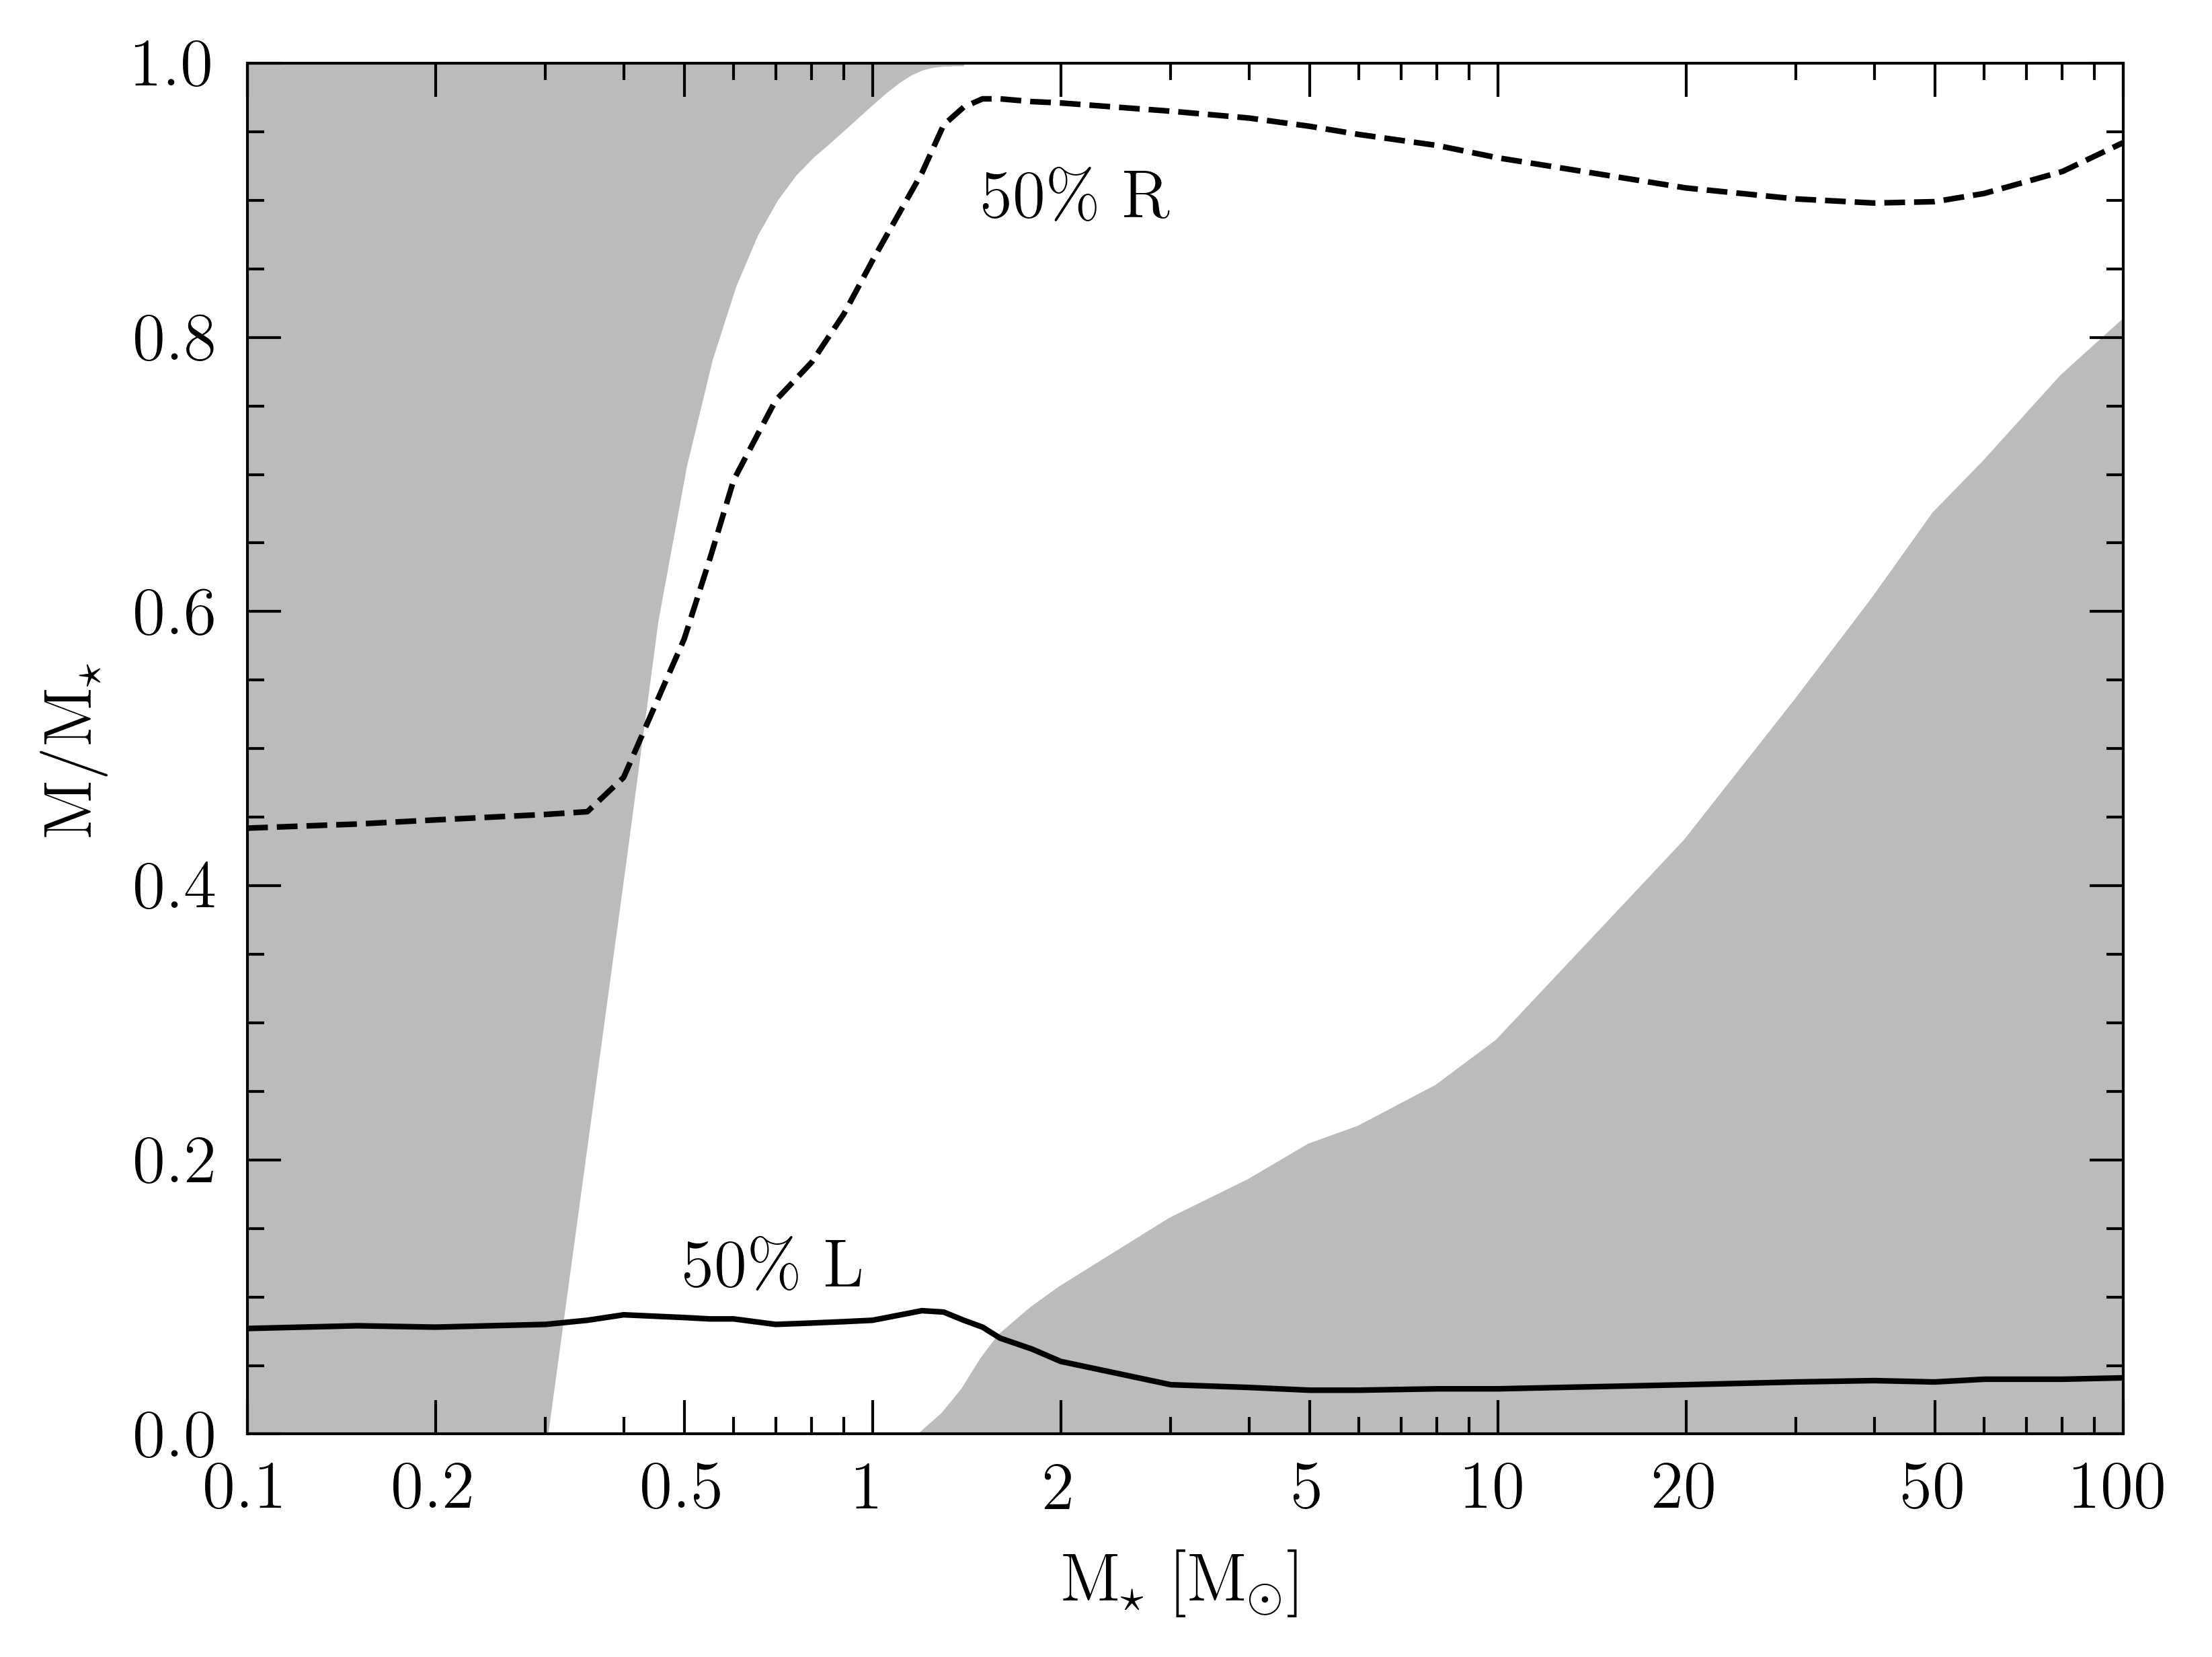

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(xMin,xMax)
ax.set_xscale('log')
ax.set_xticks([0.1,0.2,0.5,1.0,2,5,10,20,50,100])
ax.set_xticklabels(['0.1','0.2','0.5','1','2','5','10','20','50','100'])
ax.set_xlabel(r'M$_\star$ [M$_\odot$]',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_ylabel(r'M/M$_\star$',fontsize=axisFontSize)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

# Plot 50% radius and luminosity m/Mstar locations

ax.plot(lrMstar,mL50,'-',color='black',lw=1,zorder=10)
ax.plot(lrMstar,mR50,'--',color='black',lw=1,zorder=10)

# plot convection zones as gray filled areas (trick with zorder because EPS does not support transparent color)

ax.fill(loMs,loMc,color='#bbbbbb',zorder=1)
ax.fill(hiMs,hiMc,color='#bbbbbb',zorder=1)

# label the 50% radius & luminosity curves

ax.text(1.5,0.9,r'50\% R',fontsize=axisFontSize,color='black',va='center',ha='left')
ax.text(0.7,0.12,r'50\% L',fontsize=axisFontSize,color='black',va='center',ha='center')

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')